In [1]:
import pandas as pd
import numpy as np
import copy
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Import Data

### Pick List

In [2]:
import pandas as pd
import io

df_pick_list = pd.read_csv('python_read_csv_Picklist for miniproject.csv')
df_pick_list = df_pick_list.set_index('#pick list')
df_pick_list.head()

,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,81,82,83,84
#pick list,,,,,,,,,,,,,,,,,,,,,
1,25300AT300,1495638U1A,1229631U20,226804M511,11955JA10D,H05614FN0A,2530062J0E,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34935EB70A,654703TS0B,654713TS0B,K34704JAMA,D65005EK1A,55046EB70C,55047EB70C,K85811HJ0B,22401ED815,658222LR0A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34935EB70A,990984JA2B,K34704JAMA,G2G1689900,212009HP0A,224011KC1C,135101KC1A,480803RH1A,306105X01D,112102Y00E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B3G314M50B,622243VA0B,170444M405,215064M400,215064M400,788164JD0A,165576N200,K15533VA0A,248208M400,119271HC0D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,990984JA2B,113503TS0B,D86401AA1A,224485EK0A,315263VX0A,215064M400,C9G41ET000,D85201AA1A,54034EB70A,441003HA0B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SKU Class A

In [3]:
df_sku = pd.read_csv('python_read_csv_List_SKU.csv')
df_sku.head()

,SKU
0,206068H30A
1,G2G1689900
2,112106091
3,622253BG0A
4,210515EK0A


In [4]:
items = set()
for col in df_pick_list:
    items.update(df_pick_list[col].unique())
items.remove(np.nan)
print('Number of Items : ',len(items),' ---> ',items)

Number of Items :  2890  --->  {'277311KM0A', '21010BV80B', '14930EN20A', '54325ED02A', '288954JA1A', '658114JE5A', '828134CA0B', '080B74701A', '12303JN30A', '963663RA0A', '802923BG5A', '44060CY025', '54613JN20A', '826461HH5B', '39776EN000', 'D85213RA1A', '828183VA0A', '392418V100', '243813JA0A', '21631JN81D', '11823JA11B', '272881HA5A', '250608H31A', '23731EC01A', '963744CA0A', '963663GF0A', '76921EB700', '277494BU0A', '41080AU025', '26261C9903', '14055EC00A', '3137580X01', '34935EE500', '282685W50A', '828195RY0A', '11826EN21D', '54613EB70A', '546138H318', '799161KA3A', '550363TA0A', 'F23104BA0A', '80730ED00B', 'G68251KA0B', '112708J10A', '117502W21C', '123034KV0A', '546131HA0E', 'D65005KA1A', '1132050Y11', '54459EE94A', '11360JD00A', '25380JG01A', '328654JA6A', '56110D22B0', '155501181', '392428V010', '365313BG0A', '265903VA0A', '015530170U', '985813JA0A', '5432050Y12', '788211GR0A', '80683JR00D', '13085EB310', '1351053J01', '11950JN30A', '113601HC0C', '990533ZB0A', '479453TS0B', '62

In [5]:
set_SKU_A = set(df_sku['SKU'].tolist())
print('Number of Items : ',len(set_SKU_A),' ---> ',set_SKU_A)

Number of Items :  100  --->  {'200743LT0A', '14035ED800', '990984JA0C', '28913JX00A', '54613JN20A', '317263JX0A', 'D85213RA1A', '474781HJ1A', '622243HM0A', '622A07W80H', 'D85201AA1A', '16600EN200', '28920CN000', '11320JN02D', '206955TA0B', '254013AA1E', '622251HH0A', '210104BC0A', '1229631U20', '261608990A', 'B3G314M50B', '277323VA0A', '807313SB0B', '144155X00A', '1734279900', '622243BG0A', '2101000Q3K', 'B2318N3301', '15196AD200', '788174JD0A', '546681AA0A', '155800731', '34935EB70A', '118263RA5A', '166003TA0A', '135101LA0A', '210515EK0A', '320064KV0A', '21200ED00A', '622253BG0A', '46531CK000', '383428', '14710ED00B', '546181AA0A', '622A08A44H', '112106091', '622241HH0A', '543201HJ0A', '543204CL0B', '16600JK00A', '140351HC0A', '13276BN30A', '113601HC0C', '155310501', '622253HM0A', '13270EE50A', '668954CL0A', '206951HA2C', '788164JD0A', 'B40115WM0B', '214307999C', '206951HJ5D', '487001HH2B', '315263VX0A', '155309321', '226931HC0B', 'D86401AA1A', '4870306F0A', '226A01KC0A', 'C9G41ET000

## Change Pick List to one hot for SKU A 100 Items

In [6]:
itemset = set(set_SKU_A)
encoded_vals = []
for index, row in df_pick_list.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [7]:
ohe_df

,200743LT0A,14035ED800,668954CL0A,990984JA0C,206951HA2C,788164JD0A,28913JX00A,54613JN20A,317263JX0A,D85213RA1A,...,543204CL0B,16600JK00A,140351HC0A,13276BN30A,D65005EK1A,113601HC0C,155310501,622253HM0A,13270EE50A,1229631U20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_item = ohe_df
df_profile = df_item.melt(var_name="Product", value_name="Sum")
df_sum = df_profile.groupby(['Product']).sum().reset_index()
df_sum['support_1_item'] = df_sum['Sum']/len(ohe_df.index)
df_sum_sort = df_sum.sort_values(by = ['Sum'], ascending=[False])
df_product_select = df_sum_sort
df_product_select

,Product,Sum,support_1_item
35,206068H30A,30,0.077922
98,G2G1689900,28,0.072727
2,112106091,25,0.064935
43,210515EK0A,22,0.057143
74,622253BG0A,21,0.054545
...,...,...,...
81,788174JD0A,8,0.020779
80,788164JD0A,8,0.020779
34,200743LT0A,8,0.020779
65,543204CL0B,7,0.018182


In [9]:
#df_product_select.to_csv('product_with_sum.csv')

## Find Frequent Itemsets by Apriori

In [10]:
frequent_itemsets  = apriori(ohe_df, min_support=0.01, use_colnames=True)   #apriori
#freq_items = fpgrowth(ohe_df, minSup=0.01, use_colnames=True)   #min_support_1_item
frequent_itemsets .sort_values('support', ascending=False)

,support,itemsets
88,0.077922,(206068H30A)
85,0.072727,(G2G1689900)
86,0.064935,(112106091)
70,0.057143,(210515EK0A)
166,0.054545,"(210515EK0A, 112106091)"
...,...,...
142,0.010390,"(210515EK0A, 277323VA0A)"
140,0.010390,"(261608990A, 383428)"
139,0.010390,"(261608990A, 622253BG0A)"
138,0.010390,"(261608990A, 210144BC0A)"


In [11]:
#frequent_itemsets .to_csv('apiori_supplychain.csv')

## Find Association Rules

In [12]:
rules = association_rules(frequent_itemsets , metric='lift', min_threshold=1)
rules.sort_values(['support'], ascending=False)   #min_support=0.01  , lift_min_threshold=1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
132,(210515EK0A),(112106091),0.057143,0.064935,0.054545,0.954545,14.700000,0.050835,20.571429
133,(112106091),(210515EK0A),0.064935,0.057143,0.054545,0.840000,14.700000,0.050835,5.892857
51,(206955TA0B),(206955WJ0A),0.044156,0.044156,0.044156,1.000000,22.647059,0.042206,inf
50,(206955WJ0A),(206955TA0B),0.044156,0.044156,0.044156,1.000000,22.647059,0.042206,inf
227,"(206068H30A, 206955TA0B)",(206955WJ0A),0.038961,0.044156,0.038961,1.000000,22.647059,0.037241,inf
...,...,...,...,...,...,...,...,...,...
185,"(206955TA0B, 277323VA0A)",(206068H30A),0.010390,0.077922,0.010390,1.000000,12.833333,0.009580,inf
184,"(206068H30A, 277323VA0A)",(206955TA0B),0.010390,0.044156,0.010390,1.000000,22.647059,0.009931,inf
183,(206955TA0B),"(206955WJ0A, 277323VA0A)",0.044156,0.010390,0.010390,0.235294,22.647059,0.009931,1.294106
182,(206955WJ0A),"(206955TA0B, 277323VA0A)",0.044156,0.010390,0.010390,0.235294,22.647059,0.009931,1.294106


In [13]:
#rules.to_csv('rules_supplychain.csv')

In [14]:
rules.dtypes

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
dtype: object

## Explore Relation each metric

C:\Users\Pisuts\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


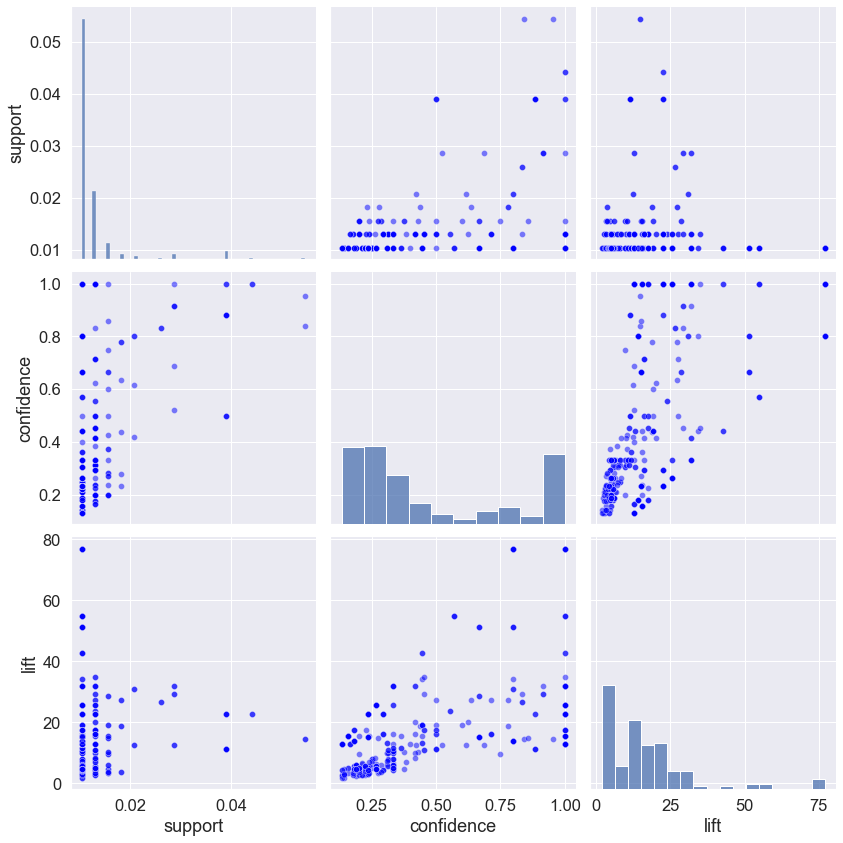

In [15]:
sns.set(font_scale=1.5)
sns.pairplot(rules, vars=['support','confidence','lift'], plot_kws = {'color':'blue', 'alpha':.5}, size=4)

## Choose number of antecedents & consequents = 1

In [16]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) ]  #& (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)
simple_rules_sort=simple_rules.sort_values(['antecedent support','antecedents','consequent support','consequents','support','confidence','lift'], ascending=False)  # min_support = 0.01 , min_lift = 1
simple_rules_sort["antecedents"] = simple_rules_sort["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
simple_rules_sort["consequents"] = simple_rules_sort["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
simple_rules_sort

(166, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,206068H30A,G2G1689900,0.077922,0.072727,0.010390,0.133333,1.833333,0.004723,1.069930
162,206068H30A,112106091,0.077922,0.064935,0.018182,0.233333,3.593333,0.013122,1.219650
135,206068H30A,210515EK0A,0.077922,0.057143,0.015584,0.200000,3.500000,0.011132,1.178571
145,206068H30A,622253BG0A,0.077922,0.054545,0.010390,0.133333,2.444444,0.006139,1.090909
16,206068H30A,990984JA0C,0.077922,0.049351,0.010390,0.133333,2.701754,0.006544,1.096903
...,...,...,...,...,...,...,...,...,...
95,118105H71A,11350JP00B,0.023377,0.023377,0.010390,0.444444,19.012346,0.009843,1.757922
25,D85213RA1A,317263JX0A,0.020779,0.031169,0.010390,0.500000,16.041667,0.009742,1.937662
1,200743LT0A,206068H30A,0.020779,0.077922,0.015584,0.750000,9.625000,0.013965,3.688312
58,622241HH0A,622251HH0A,0.020779,0.031169,0.012987,0.625000,20.052083,0.012339,2.583550


In [17]:
simple_rules_sort['antecedents'] = simple_rules_sort['antecedents'].str.strip()
simple_rules_sort['consequents'] = simple_rules_sort['consequents'].str.strip()
simple_rules_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,206068H30A,G2G1689900,0.077922,0.072727,0.010390,0.133333,1.833333,0.004723,1.069930
162,206068H30A,112106091,0.077922,0.064935,0.018182,0.233333,3.593333,0.013122,1.219650
135,206068H30A,210515EK0A,0.077922,0.057143,0.015584,0.200000,3.500000,0.011132,1.178571
145,206068H30A,622253BG0A,0.077922,0.054545,0.010390,0.133333,2.444444,0.006139,1.090909
16,206068H30A,990984JA0C,0.077922,0.049351,0.010390,0.133333,2.701754,0.006544,1.096903
...,...,...,...,...,...,...,...,...,...
95,118105H71A,11350JP00B,0.023377,0.023377,0.010390,0.444444,19.012346,0.009843,1.757922
25,D85213RA1A,317263JX0A,0.020779,0.031169,0.010390,0.500000,16.041667,0.009742,1.937662
1,200743LT0A,206068H30A,0.020779,0.077922,0.015584,0.750000,9.625000,0.013965,3.688312
58,622241HH0A,622251HH0A,0.020779,0.031169,0.012987,0.625000,20.052083,0.012339,2.583550


In [18]:
index = simple_rules_sort.index
num_rows_rules = len(index)
num_rows_rules

166

## Extract Location from csv

In [19]:
df_distance=pd.read_csv('python_read_csv_Distance.csv')
df_distance

,Location,Distance_from_I/O,A02D,A02E,A02F,A02U,A02V
0,A02F,2150,600,300,0,0,300
1,A02U,2150,600,300,0,0,300
2,A02E,2450,300,0,300,300,0
3,A02V,2450,300,0,300,300,0
4,A02D,2750,0,300,600,600,300


In [20]:
df_distance_min = df_distance.head(1)
df_distance_min

,Location,Distance_from_I/O,A02D,A02E,A02F,A02U,A02V
0,A02F,2150,600,300,0,0,300


In [21]:
df_fix_location_nearest = df_distance_min.melt(id_vars=["Location", "Distance_from_I/O"], 
        var_name="Location_nearby", 
        value_name="Distance_near_location")
df_fix_location_nearest = df_fix_location_nearest.sort_values(['Distance_near_location'])
df_fix_location_nearest

,Location,Distance_from_I/O,Location_nearby,Distance_near_location
2,A02F,2150,A02F,0
3,A02F,2150,A02U,0
1,A02F,2150,A02E,300
4,A02F,2150,A02V,300
0,A02F,2150,A02D,600


In [22]:
num_rows_rules

166

## Grouping items to each list

In [23]:
lst_item = []
lst_set_item = []
lst_check_dup = []
trans=1
for ind,row in simple_rules_sort.iterrows():  
    trans+=1
         
    if row['antecedents'] not in lst_item and row['antecedents'] not in lst_check_dup:
        lst_item.append(row['antecedents'])
        if len(lst_item) == 20: # when number of set item = 20 --> add
            lst_item_insert=copy.deepcopy(lst_item)
            lst_set_item.append(lst_item_insert)
            lst_item = []        
       
    if row['consequents'] not in lst_item and row['consequents'] not in lst_check_dup:
        lst_item.append(row['consequents'])
        if len(lst_item) == 20: # when number of set item = 20 --> add
            lst_item_insert=copy.deepcopy(lst_item)
            lst_set_item.append(lst_item_insert)
            lst_item = []          

    lst_check_dup.append(row['antecedents'])
    lst_check_dup.append(row['consequents']) 
    

    if num_rows_rules == trans:  #last set of item 
        SKU_A_rest = set_SKU_A-set(lst_check_dup)
        num_r=0
        for r in df_product_select['Product']: #list(SKU_A_rest):
            if r not in lst_check_dup:
                num_r+=1
                if len(lst_item) != 20:
                    lst_item.append(r)

                if len(lst_item) == 20:                   
                    lst_item_insert=copy.deepcopy(lst_item)
                    lst_set_item.append(lst_item_insert)
                    lst_item = []

                if len(SKU_A_rest) == num_r and len(lst_item)!= 0:
                    lst_item_insert=copy.deepcopy(lst_item)
                    lst_set_item.append(lst_item_insert)
                    lst_item = []      

                lst_check_dup.append(r)

            
print('Number of set items ',len(lst_set_item) ,' --> ',lst_set_item)    
print(set_SKU_A-set(lst_check_dup)) # SKU ที่เหลือ
#print('set(lst_check_dup)   ',set(lst_check_dup))

Number of set items  5  -->  [['206068H30A', 'G2G1689900', '112106091', '210515EK0A', '622253BG0A', '990984JA0C', '277323VA0A', '206955TA0B', '206955WJ0A', '206951HJ5D', '14710ED00B', '1734279900', '200743LT0A', '155310501', '668954CL0A', '668944CL0A', '166001KT0A', '622243BG0A', '113503TS0B', '383428'], ['261608990A', '210144BC0A', '210104BC0A', '4870306F0A', '487001HH2B', '1518969F00', '113601HC0C', '474781HJ1A', '317263JX0A', 'C9GDA6N20H', '206951HA2C', '546681AA0A', '546181AA0A', '118105H71A', '11350JP00B', '543258271R', 'D85213RA1A', '54613JN20A', '144165X00A', '15196AD200'], ['21200ED00A', '622251HH0A', '622241HH0A', '622253HM0A', '622243HM0A', '34935EB70A', 'K34704JAMA', 'D86401AA1A', 'D85201AA1A', '543204CL0B', '118263RA5A', '1506631U02', '1229631U20', '14035ED800', '13270EE50A', '140351HC0A', '16600EN200', '990984JA2B', '807313SB0B', '540503NF0A'], ['1102601M02', '155800731', 'B40115WM0B', '543201HJ0A', '11220JA000', 'D65005EK1A', '166001HC0A', '166003TA0A', '215064M400', '155

In [24]:
df_fix_location_nearest=df_fix_location_nearest.reset_index(drop=True)
df_fix_location_nearest

,Location,Distance_from_I/O,Location_nearby,Distance_near_location
0,A02F,2150,A02F,0
1,A02F,2150,A02U,0
2,A02F,2150,A02E,300
3,A02F,2150,A02V,300
4,A02F,2150,A02D,600


In [25]:
lst_set_item_str = []
for i in lst_set_item:
    str_item = ','.join(i)
    lst_set_item_str.append(str_item)
    str_item=''
lst_set_item_str    

['206068H30A,G2G1689900,112106091,210515EK0A,622253BG0A,990984JA0C,277323VA0A,206955TA0B,206955WJ0A,206951HJ5D,14710ED00B,1734279900,200743LT0A,155310501,668954CL0A,668944CL0A,166001KT0A,622243BG0A,113503TS0B,383428',
 '261608990A,210144BC0A,210104BC0A,4870306F0A,487001HH2B,1518969F00,113601HC0C,474781HJ1A,317263JX0A,C9GDA6N20H,206951HA2C,546681AA0A,546181AA0A,118105H71A,11350JP00B,543258271R,D85213RA1A,54613JN20A,144165X00A,15196AD200',
 '21200ED00A,622251HH0A,622241HH0A,622253HM0A,622243HM0A,34935EB70A,K34704JAMA,D86401AA1A,D85201AA1A,543204CL0B,118263RA5A,1506631U02,1229631U20,14035ED800,13270EE50A,140351HC0A,16600EN200,990984JA2B,807313SB0B,540503NF0A',
 '1102601M02,155800731,B40115WM0B,543201HJ0A,11220JA000,D65005EK1A,166001HC0A,166003TA0A,215064M400,155309321,16600JK00A,11320JN02D,B3G314M50B,2101000Q3K,1106500Q0L,112201J50A,214307999C,226931HC0B,226A01KC0A,28913JX00A',
 '320064KV0A,C9G41ET000,622A07W80H,D86403RA1A,B2318N3301,132703AA0A,28920CN000,13276BN30A,135101LA0A,15066AD200,

In [26]:
df_set_items = pd.DataFrame(
    columns=['set_items'])

for items in lst_set_item_str:
    temp_df = pd.DataFrame([items], columns=['set_items'])
    df_set_items = df_set_items.append(temp_df, ignore_index=True)
df_set_items

,set_items
0,"206068H30A,G2G1689900,112106091,210515EK0A,622..."
1,"261608990A,210144BC0A,210104BC0A,4870306F0A,48..."
2,"21200ED00A,622251HH0A,622241HH0A,622253HM0A,62..."
3,"1102601M02,155800731,B40115WM0B,543201HJ0A,112..."
4,"320064KV0A,C9G41ET000,622A07W80H,D86403RA1A,B2..."


## Assign itemsets to each locations

In [27]:
#SKU Distance start from nearest I/O
df_fix_location_nearest_item = df_fix_location_nearest.join(df_set_items)
df_fix_location_nearest_item['set_items'] = df_fix_location_nearest_item['set_items'].str.split(',')
df_fix_location_nearest_item

,Location,Distance_from_I/O,Location_nearby,Distance_near_location,set_items
0,A02F,2150,A02F,0,"[206068H30A, G2G1689900, 112106091, 210515EK0A..."
1,A02F,2150,A02U,0,"[261608990A, 210144BC0A, 210104BC0A, 4870306F0..."
2,A02F,2150,A02E,300,"[21200ED00A, 622251HH0A, 622241HH0A, 622253HM0..."
3,A02F,2150,A02V,300,"[1102601M02, 155800731, B40115WM0B, 543201HJ0A..."
4,A02F,2150,A02D,600,"[320064KV0A, C9G41ET000, 622A07W80H, D86403RA1..."


In [28]:
ohe_df_item=ohe_df.loc[:, ].replace(1, pd.Series(ohe_df.columns, ohe_df.columns))
ohe_df_item_t = ohe_df_item.T
ohe_df_item_t

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
200743LT0A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14035ED800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668954CL0A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990984JA0C,0,0,0,0,0,0,0,0,0,0,...,990984JA0C,0,0,0,0,0,0,0,0,0
206951HA2C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113601HC0C,0,0,0,0,0,0,0,0,0,0,...,113601HC0C,0,0,0,0,0,0,0,0,0
155310501,0,0,0,0,0,0,0,0,0,0,...,155310501,0,0,0,0,155310501,0,0,0,0
622253HM0A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13270EE50A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Test pick items from orders of picklist

In [29]:
raw_put_away_item_lst=[]
for col_ohe in ohe_df_item_t: #column basket
    for ind_item,row_item in ohe_df_item_t.iterrows(): #row basket
        for ind_set,row_set in df_fix_location_nearest_item.iterrows(): #set item in location
            if row_item[col_ohe] in row_set['set_items']:
                raw_put_away_item_lst.append([col_ohe,row_set['Location_nearby'],row_set['Distance_from_I/O'],row_set['Distance_near_location'],row_item[col_ohe]])

In [30]:
raw_put_away_item_lst

[[0, 'A02E', 2150, 300, '1229631U20'],
 [1, 'A02E', 2150, 300, '34935EB70A'],
 [1, 'A02E', 2150, 300, 'K34704JAMA'],
 [1, 'A02V', 2150, 300, 'D65005EK1A'],
 [2, 'A02E', 2150, 300, '990984JA2B'],
 [2, 'A02E', 2150, 300, '34935EB70A'],
 [2, 'A02E', 2150, 300, 'K34704JAMA'],
 [2, 'A02F', 2150, 0, 'G2G1689900'],
 [3, 'A02D', 2150, 600, '788164JD0A'],
 [3, 'A02V', 2150, 300, 'B3G314M50B'],
 [3, 'A02V', 2150, 300, '215064M400'],
 [4, 'A02D', 2150, 600, '315263VX0A'],
 [4, 'A02E', 2150, 300, 'D86401AA1A'],
 [4, 'A02E', 2150, 300, 'D85201AA1A'],
 [4, 'A02D', 2150, 600, 'C9G41ET000'],
 [4, 'A02F', 2150, 0, '113503TS0B'],
 [4, 'A02E', 2150, 300, '990984JA2B'],
 [4, 'A02V', 2150, 300, '215064M400'],
 [5, 'A02U', 2150, 0, '487001HH2B'],
 [5, 'A02E', 2150, 300, '16600EN200'],
 [5, 'A02F', 2150, 0, '1734279900'],
 [5, 'A02U', 2150, 0, '1518969F00'],
 [5, 'A02F', 2150, 0, '206068H30A'],
 [5, 'A02E', 2150, 300, '140351HC0A'],
 [6, 'A02V', 2150, 300, '166003TA0A'],
 [7, 'A02V', 2150, 300, '155309321'],

In [31]:
df_raw_put_away_item = pd.DataFrame(raw_put_away_item_lst, columns =['Basket_ID','Location','Distance_between_I/O&A02F','Distance_between_A02F&locations','Item'])
df_raw_put_away_item

,Basket_ID,Location,Distance_between_I/O&A02F,Distance_between_A02F&locations,Item
0,0,A02E,2150,300,1229631U20
1,1,A02E,2150,300,34935EB70A
2,1,A02E,2150,300,K34704JAMA
3,1,A02V,2150,300,D65005EK1A
4,2,A02E,2150,300,990984JA2B
...,...,...,...,...,...
1187,377,A02U,2150,0,D85213RA1A
1188,380,A02D,2150,600,28920CN000
1189,380,A02F,2150,0,155310501
1190,383,A02D,2150,600,990984JA0D


## Calculate Distance

In [32]:
df_prep_cal_distance=df_raw_put_away_item
df_prep_cal_distance=df_prep_cal_distance.groupby(['Basket_ID','Distance_between_I/O&A02F']).agg(
    Max_distance_between_locations=('Distance_between_A02F&locations','max'),   
)
df_prep_cal_distance

#df_prep_cal_distance=df_prep_cal_distance.groupby(['Basket_ID','Distance_from_I/O']).agg(
#    sum_distance_between_location=('min_distance','sum'),   
#)
#df_prep_cal_distance
df_prep_cal_distance=df_prep_cal_distance.reset_index()
df_prep_cal_distance['total_distance'] = df_prep_cal_distance['Distance_between_I/O&A02F'] + df_prep_cal_distance['Max_distance_between_locations']
df_prep_cal_distance

,Basket_ID,Distance_between_I/O&A02F,Max_distance_between_locations,total_distance
0,0,2150,300,2450
1,1,2150,300,2450
2,2,2150,300,2450
3,3,2150,600,2750
4,4,2150,600,2750
...,...,...,...,...
283,376,2150,600,2750
284,377,2150,0,2150
285,380,2150,600,2750
286,383,2150,600,2750


In [33]:
print(df_prep_cal_distance['total_distance'].sum())

734400


In [34]:
#df_raw_put_away_item.to_csv('ass_rule_df_raw_put_away_item.csv')
#ohe_df_item_t.to_csv('ass_rule_basket_trans.csv')
#df_fix_location_nearest_item.to_csv('put_away_item_to_location.csv')
#df_prep_cal_distance.to_csv('ass_rule_df_prep_cal_distance.csv')
#simple_rules_sort.to_csv('association_rules.csv')

## Class Based

In [35]:
df_put_away_class_based = pd.read_csv('python_read_csv_Put_away_Class_Based.csv')
df_put_away_class_based['set_items'] = df_put_away_class_based['set_items'].str.split(',')
df_put_away_class_based

,Location,Distance_from_I/O,Location_nearby,Distance_nearby_location,set_items
0,A02F,2150,A02F,0,"[206068H30A, G2G1689900, 112106091, 622253BG0A..."
1,A02F,2150,A02U,0,"[668944CL0A, 474781HJ1A, 317263JX0A, 2101000Q3..."
2,A02F,2150,A02E,300,"[215064M400, 144165X00A, 1518969F00, 14710ED00..."
3,A02F,2150,A02V,300,"[11220JA000, C9G41ET000, D86401AA1A, D85201AA1..."
4,A02F,2150,A02D,600,"[622243HM0A, 28920CN000, 315263VX0A, 254013AA1..."


In [36]:
raw_put_away_item_class_based_lst=[]
for col_ohe in ohe_df_item_t: #column basket
    for ind_item,row_item in ohe_df_item_t.iterrows(): #row basket
        for ind_set,row_set in df_put_away_class_based.iterrows(): #set item in location
            if row_item[col_ohe] in row_set['set_items']:
                raw_put_away_item_class_based_lst.append([col_ohe,row_set['Location_nearby'],row_set['Distance_from_I/O'],row_set['Distance_nearby_location'],row_item[col_ohe]])

In [37]:
raw_put_away_item_class_based_lst

[[0, 'A02D', 2150, 600, '1229631U20'],
 [1, 'A02E', 2150, 300, '34935EB70A'],
 [1, 'A02V', 2150, 300, 'K34704JAMA'],
 [1, 'A02E', 2150, 300, 'D65005EK1A'],
 [2, 'A02U', 2150, 0, '990984JA2B'],
 [2, 'A02E', 2150, 300, '34935EB70A'],
 [2, 'A02V', 2150, 300, 'K34704JAMA'],
 [2, 'A02F', 2150, 0, 'G2G1689900'],
 [3, 'A02D', 2150, 600, '788164JD0A'],
 [3, 'A02U', 2150, 0, 'B3G314M50B'],
 [3, 'A02E', 2150, 300, '215064M400'],
 [4, 'A02D', 2150, 600, '315263VX0A'],
 [4, 'A02V', 2150, 300, 'D86401AA1A'],
 [4, 'A02V', 2150, 300, 'D85201AA1A'],
 [4, 'A02V', 2150, 300, 'C9G41ET000'],
 [4, 'A02U', 2150, 0, '113503TS0B'],
 [4, 'A02U', 2150, 0, '990984JA2B'],
 [4, 'A02E', 2150, 300, '215064M400'],
 [5, 'A02U', 2150, 0, '487001HH2B'],
 [5, 'A02F', 2150, 0, '16600EN200'],
 [5, 'A02U', 2150, 0, '1734279900'],
 [5, 'A02E', 2150, 300, '1518969F00'],
 [5, 'A02F', 2150, 0, '206068H30A'],
 [5, 'A02F', 2150, 0, '140351HC0A'],
 [6, 'A02U', 2150, 0, '166003TA0A'],
 [7, 'A02V', 2150, 300, '155309321'],
 [7, 'A02

In [38]:
df_raw_put_away_item_class_based = pd.DataFrame(raw_put_away_item_class_based_lst, columns =['Basket_ID','Location','Distance_between_I/O&A02F','Distance_between_A02F&locations','Item'])
df_raw_put_away_item_class_based

,Basket_ID,Location,Distance_between_I/O&A02F,Distance_between_A02F&locations,Item
0,0,A02D,2150,600,1229631U20
1,1,A02E,2150,300,34935EB70A
2,1,A02V,2150,300,K34704JAMA
3,1,A02E,2150,300,D65005EK1A
4,2,A02U,2150,0,990984JA2B
...,...,...,...,...,...
1187,377,A02D,2150,600,D85213RA1A
1188,380,A02D,2150,600,28920CN000
1189,380,A02F,2150,0,155310501
1190,383,A02D,2150,600,990984JA0D


In [39]:
df_prep_cal_distance_class_based=df_raw_put_away_item_class_based
df_prep_cal_distance_class_based=df_prep_cal_distance_class_based.groupby(['Basket_ID','Distance_between_I/O&A02F']).agg(
    Max_distance_between_locations=('Distance_between_A02F&locations','max'),   
)
df_prep_cal_distance_class_based

#df_prep_cal_distance=df_prep_cal_distance.groupby(['Basket_ID','Distance_from_I/O']).agg(
#    sum_distance_between_location=('min_distance','sum'),   
#)
#df_prep_cal_distance
df_prep_cal_distance_class_based=df_prep_cal_distance_class_based.reset_index()
df_prep_cal_distance_class_based['total_distance'] = df_prep_cal_distance_class_based['Distance_between_I/O&A02F'] + df_prep_cal_distance_class_based['Max_distance_between_locations']
df_prep_cal_distance_class_based

,Basket_ID,Distance_between_I/O&A02F,Max_distance_between_locations,total_distance
0,0,2150,600,2750
1,1,2150,300,2450
2,2,2150,300,2450
3,3,2150,600,2750
4,4,2150,600,2750
...,...,...,...,...
283,376,2150,600,2750
284,377,2150,600,2750
285,380,2150,600,2750
286,383,2150,600,2750


In [40]:
print(df_prep_cal_distance_class_based['total_distance'].sum())

726300


## Integer Programming

In [41]:
df_put_away_integer_programming = pd.read_csv('python_read_csv_Put_away_Integer_Programming.csv')
df_put_away_integer_programming['set_items'] = df_put_away_integer_programming['set_items'].str.split(',')
df_put_away_integer_programming

,Location,Distance_from_I/O,Location_nearby,Distance_nearby_location,set_items
0,A02F,2150,A02F,0,"[622253BG0A, 14035ED800, 155310501, 4870306F0A..."
1,A02F,2150,A02U,0,"[206068H30A, G2G1689900, 112106091, 210515EK0A..."
2,A02F,2150,A02E,300,"[807313SB0B, 546681AA0A, 622251HH0A, 210104BC0..."
3,A02F,2150,A02V,300,"[990984JA2B, B40115WM0B, 543201HJ0A, 543258271..."
4,A02F,2150,A02D,600,"[B2318N3301, 543204CL0B, 144155X00A, 13276BN30..."
5,A02F,2150,A02W,600,"[K34704JAMA, 622A07W80H, 622243HM0A, 315263VX0..."


In [42]:
raw_put_away_item_integer_programming_lst=[]
for col_ohe in ohe_df_item_t: #column basket
    for ind_item,row_item in ohe_df_item_t.iterrows(): #row basket
        for ind_set,row_set in df_put_away_integer_programming.iterrows(): #set item in location
            if row_item[col_ohe] in row_set['set_items']:
                raw_put_away_item_integer_programming_lst.append([col_ohe,row_set['Location_nearby'],row_set['Distance_from_I/O'],row_set['Distance_nearby_location'],row_item[col_ohe]])

In [43]:
raw_put_away_item_integer_programming_lst

[[0, 'A02D', 2150, 600, '1229631U20'],
 [1, 'A02V', 2150, 300, '34935EB70A'],
 [1, 'A02W', 2150, 600, 'K34704JAMA'],
 [1, 'A02E', 2150, 300, 'D65005EK1A'],
 [2, 'A02V', 2150, 300, '990984JA2B'],
 [2, 'A02V', 2150, 300, '34935EB70A'],
 [2, 'A02W', 2150, 600, 'K34704JAMA'],
 [2, 'A02U', 2150, 0, 'G2G1689900'],
 [3, 'A02D', 2150, 600, '788164JD0A'],
 [3, 'A02U', 2150, 0, 'B3G314M50B'],
 [3, 'A02F', 2150, 0, '215064M400'],
 [4, 'A02W', 2150, 600, '315263VX0A'],
 [4, 'A02E', 2150, 300, 'D86401AA1A'],
 [4, 'A02V', 2150, 300, 'D85201AA1A'],
 [4, 'A02E', 2150, 300, 'C9G41ET000'],
 [4, 'A02F', 2150, 0, '113503TS0B'],
 [4, 'A02V', 2150, 300, '990984JA2B'],
 [4, 'A02F', 2150, 0, '215064M400'],
 [5, 'A02F', 2150, 0, '487001HH2B'],
 [5, 'A02U', 2150, 0, '16600EN200'],
 [5, 'A02F', 2150, 0, '1734279900'],
 [5, 'A02F', 2150, 0, '1518969F00'],
 [5, 'A02U', 2150, 0, '206068H30A'],
 [5, 'A02F', 2150, 0, '140351HC0A'],
 [6, 'A02U', 2150, 0, '166003TA0A'],
 [7, 'A02V', 2150, 300, '155309321'],
 [7, 'A02W'

In [44]:
df_raw_put_away_item_integer_programming = pd.DataFrame(raw_put_away_item_integer_programming_lst, columns =['Basket_ID','Location','Distance_between_I/O&A02F','Distance_between_A02F&locations','Item'])
df_raw_put_away_item_integer_programming

,Basket_ID,Location,Distance_between_I/O&A02F,Distance_between_A02F&locations,Item
0,0,A02D,2150,600,1229631U20
1,1,A02V,2150,300,34935EB70A
2,1,A02W,2150,600,K34704JAMA
3,1,A02E,2150,300,D65005EK1A
4,2,A02V,2150,300,990984JA2B
...,...,...,...,...,...
1187,377,A02W,2150,600,D85213RA1A
1188,380,A02V,2150,300,28920CN000
1189,380,A02F,2150,0,155310501
1190,383,A02W,2150,600,990984JA0D


In [45]:
df_prep_cal_distance_integer_programming=df_raw_put_away_item_integer_programming
df_prep_cal_distance_integer_programming=df_prep_cal_distance_integer_programming.groupby(['Basket_ID','Distance_between_I/O&A02F']).agg(
    Max_distance_between_locations=('Distance_between_A02F&locations','max'),   
)
df_prep_cal_distance_integer_programming

#df_prep_cal_distance=df_prep_cal_distance.groupby(['Basket_ID','Distance_from_I/O']).agg(
#    sum_distance_between_location=('min_distance','sum'),   
#)
#df_prep_cal_distance
df_prep_cal_distance_integer_programming=df_prep_cal_distance_integer_programming.reset_index()
df_prep_cal_distance_integer_programming['total_distance'] = df_prep_cal_distance_integer_programming['Distance_between_I/O&A02F'] + df_prep_cal_distance_integer_programming['Max_distance_between_locations']
df_prep_cal_distance_integer_programming

,Basket_ID,Distance_between_I/O&A02F,Max_distance_between_locations,total_distance
0,0,2150,600,2750
1,1,2150,600,2750
2,2,2150,600,2750
3,3,2150,600,2750
4,4,2150,600,2750
...,...,...,...,...
283,376,2150,600,2750
284,377,2150,600,2750
285,380,2150,300,2450
286,383,2150,600,2750


In [46]:
print(df_prep_cal_distance_integer_programming['total_distance'].sum())

729300


In [47]:
print('Class Based Distance : ',df_prep_cal_distance_class_based['total_distance'].sum())
print('Integer Programming Distance : ',df_prep_cal_distance_integer_programming['total_distance'].sum())
print('Association Rules Distance : ',df_prep_cal_distance['total_distance'].sum())

Class Based Distance :  726300
Integer Programming Distance :  729300
Association Rules Distance :  734400


In [48]:
#df_raw_put_away_item_class_based.to_csv('put_away_class_based_2.csv')

In [49]:
#ohe_df_item_t.to_csv('ass_rule_basket_trans.csv')
#Ass Rule
#df_raw_put_away_item.to_csv('1.Ass_rule_assign_locations.csv')
#df_fix_location_nearest_item.to_csv('1.Ass_rule_cal_distance_items.csv')
#df_prep_cal_distance.to_csv('1.Ass_rule_cal_distance_locations.csv')
#simple_rules_sort.to_csv('1.association_rules.csv')

#Class Based
#df_raw_put_away_item_class_based.to_csv('2.Class_based_cal_distance_items.csv')
#df_prep_cal_distance_class_based.to_csv('2.Class_based_cal_distance_locations.csv')
#Integer Programming
#df_raw_put_away_item_integer_programming.to_csv('3.Integer_programming_cal_distance_items.csv')
#df_prep_cal_distance_integer_programming.to_csv('3.Integer_programming_cal_distance_locations.csv')